# 2D Design

# Part 1

Create a model of linear regression to predict COVID-19 deaths

In [6]:
#This cell is used to import all necessary packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

,country,gdp_per_capita,pop_density,pop_over_65,stringency_index,fully_vaccinated,icu_patients,deaths_in_following_week
0,Algeria,15481.78762,17.35,6.21,39.81,10.88,0.31,0.58
1,Austria,55454.68929,106.75,19.20,57.41,62.31,34.06,16.15
2,Belgium,51407.99834,375.56,18.57,45.83,73.82,27.85,17.71
3,Bulgaria,21960.36994,65.18,20.80,53.70,22.03,98.60,159.35
4,Canada,48130.25597,4.04,16.98,67.13,74.39,15.58,4.44
5,Cyprus,38513.28457,127.66,13.42,46.30,63.71,10.04,2.23
6,Czech Republic,39743.59709,137.18,19.03,35.19,56.91,27.13,25.92
7,Denmark,55671.16527,136.52,19.68,24.07,75.90,4.99,4.64
8,Estonia,35973.77646,31.03,19.45,32.41,57.50,39.99,58.10
9,Finland,48416.93603,18.14,21.23,25.93,70.02,4.87,5.41


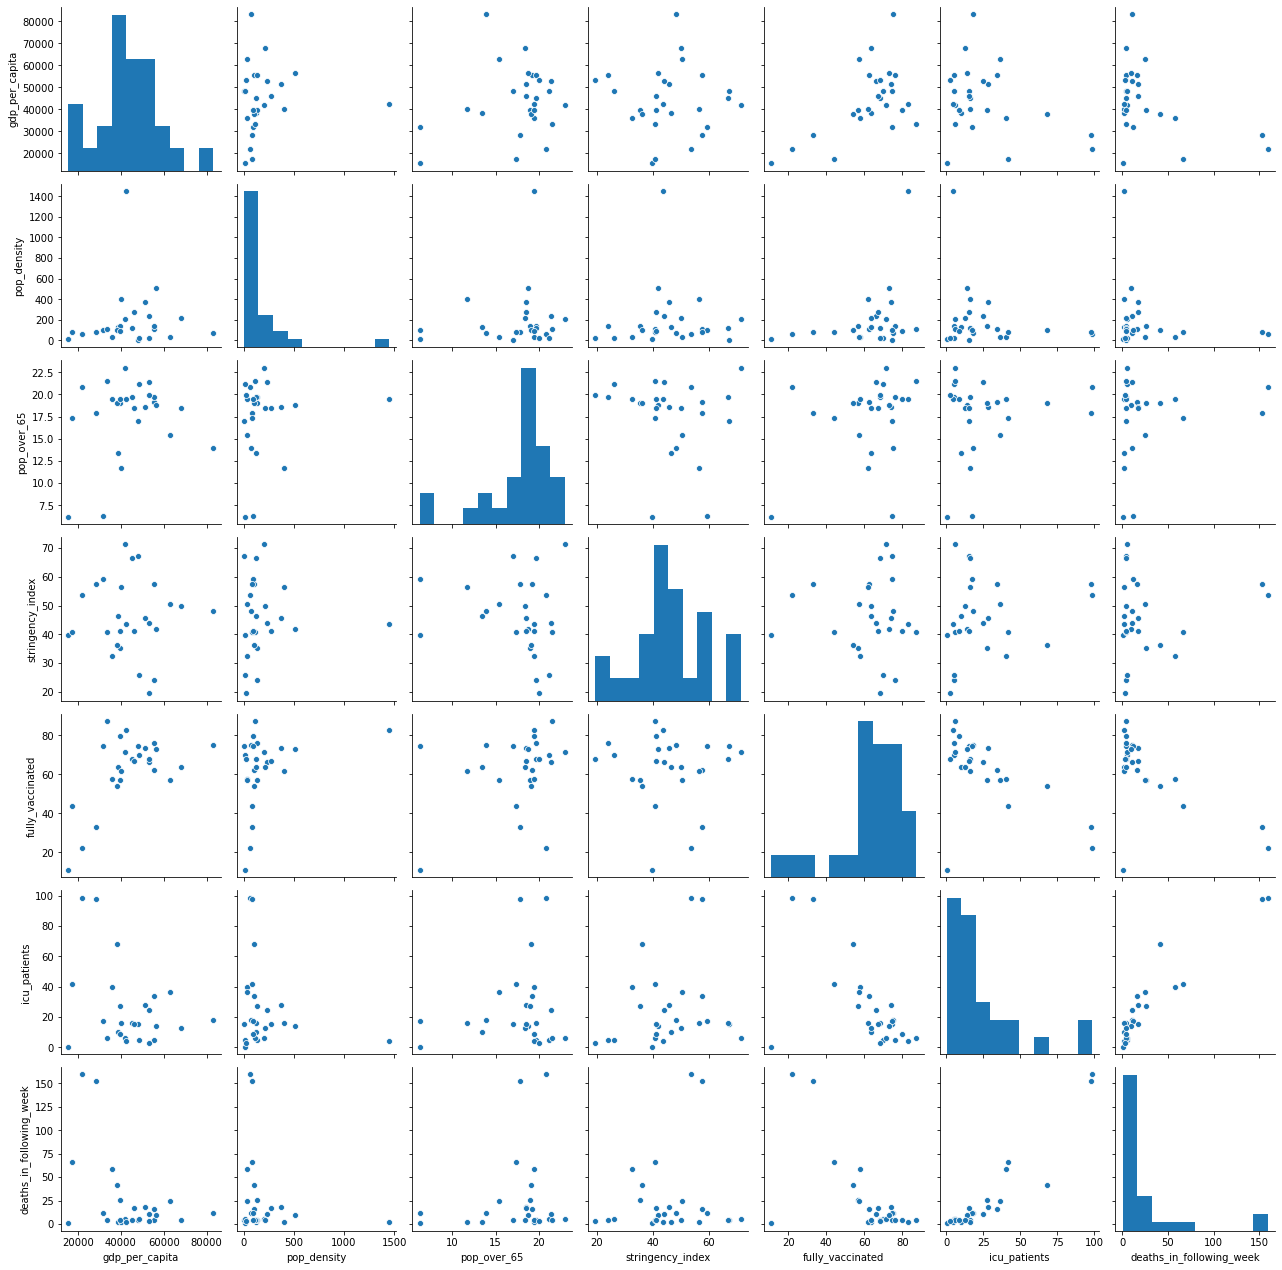

In [324]:
#This cell imports the dataset used for Task 1.
df1 = pd.read_csv("Task_1.csv")

#As "number of ICU patients" was a feature that we wanted to use, we only used countries that have such data.
display(df1)

sns.pairplot(data=df1)

In [814]:
#This cell includes all functions used in Task 1.

def normalize_z(df):
    df_out = (df-df.mean(axis=0))/df.std(axis=0)
    return df_out

def get_features_targets(df, feature_names, target_names):
    #Get dataframes that represent certain columns given the column names.
    df_feature = df.loc[:,feature_names]
    df_target = df.loc[:,target_names]
    return df_feature, df_target

def prepare_feature(df_feature):
    #This code converts a feature dataframe into a numpy array.
    cols = len(df_feature.columns)
    rows = len(df_feature)
    #The features are normalized to account for differing scales.
    df_feature = normalize_z(df_feature)
    a2 = df_feature.to_numpy().reshape((-1,cols))
    #A column of 1's is concatenated to our numpy array to represent the constant.
    a1 = np.ones((rows, 1))
    feature = np.concatenate((a1,a2),1)
    return feature

def prepare_target(df_target):
    #This code converts a target dataframe into a numpy array.
    cols = len(df_target.columns)
    target = df_target.to_numpy().reshape((-1,cols))
    return target

def predict(df_feature, beta):
    #Predict the targets using feature and beta (without normalization).
    df_np = prepare_feature(df_feature)
    y = np.matmul(df_np, beta)
    return y

def compute_cost(X, y, beta):
    #Compute the cost function of multiple linear regression.
    m = len(X)
    base = np.matmul(X,beta) - y
    square = np.matmul(base.reshape((-1,m)), base)
    J = 1/(2*m) * square
    return J

def gradient_descent(X, y, beta, alpha, num_iters):
    #Using Gradient Descent, find beta that minimises cost function.
    J_storage = []
    m = len(X)
    i = 0
    while i < num_iters:
        J = compute_cost(X, y, beta)
        base = np.matmul(X,beta) - y
        result = np.matmul(X.transpose(), base)
        beta -= alpha/m * result
        i += 1
        J_storage.extend(J)
    return beta, J_storage

def rmse(target, pred):
    #Compute the RMSE (Root Mean Square Error) of the prediction
    n = len(target)
    base = target-pred
    if  type(base)!=np.ndarray:
        base = base.to_numpy()
    square = np.matmul(base.reshape(-1,n),base)
    result = 1/n * np.sum(square)
    result = result**0.5
    return result

def mae(target, pred):
    #Compute the MAE (Mean Absolute Error) of the prediction
    n = len(target)
    base = abs(target-pred)
    if  type(base)!=np.ndarray:
        base = base.to_numpy()
    result = 1/n * np.sum(base)
    return result

12.558753580319525
8.903345880230903


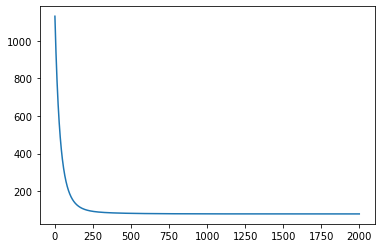

In [815]:
#Our initially chosen features are: GDP per capita, population density, percent of population aged 65+,
#stringency index, percent of population which is fully vaccinated and number of ICU patients.
#The latter 3 features had their data extracted on a specific date (1 Nov in this case)

features_columns = ["gdp_per_capita", "pop_density", "pop_over_65", "stringency_index", "fully_vaccinated", "icu_patients"]

#Our target is the number of deaths in the week following our "specific date".
#In this case, that is 2 Nov - 8 Nov.
df1_features, df1_target = get_features_targets(df1, features_columns, ["deaths_in_following_week"])

#We prepare our feature and target.
feature = prepare_feature(df1_features)
target = prepare_target(df1_target)

iterations = 2000
alpha = 0.01
beta = np.zeros((feature.shape[1],1))

J = compute_cost(feature, target, beta)

beta, J_storage = gradient_descent(feature, target, beta, alpha, iterations)

pred = predict(df1_features, beta)
print(rmse(target, pred)) #12.559
print(mae(target, pred)) #8.903

#Plot the cost function over iterations to see that cost is being minimised.
plt.plot(J_storage)

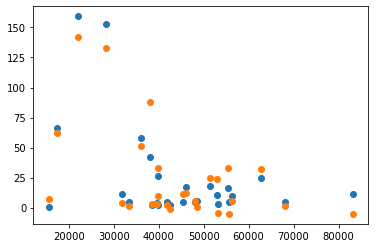

In [816]:
#Use scatter plot to visualise the model's accuracy
plt.scatter(df1_features["gdp_per_capita"], target)
plt.scatter(df1_features["gdp_per_capita"], pred)

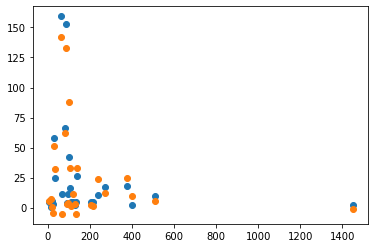

In [817]:
plt.scatter(df1_features["pop_density"], target)
plt.scatter(df1_features["pop_density"], pred)

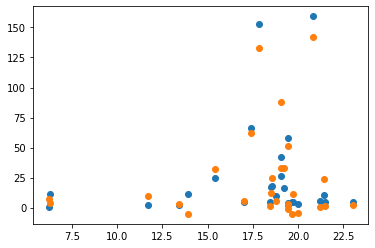

In [818]:
plt.scatter(df1_features["pop_over_65"], target)
plt.scatter(df1_features["pop_over_65"], pred)

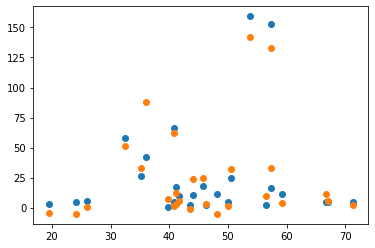

In [819]:
plt.scatter(df1_features["stringency_index"], target)
plt.scatter(df1_features["stringency_index"], pred)

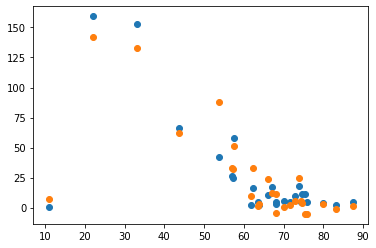

In [820]:
plt.scatter(df1_features["fully_vaccinated"], target)
plt.scatter(df1_features["fully_vaccinated"], pred)

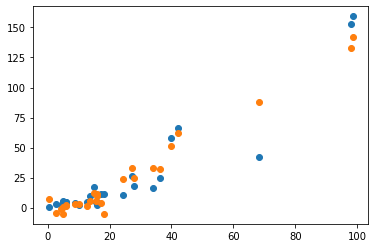

In [821]:
plt.scatter(df1_features["icu_patients"], target)
plt.scatter(df1_features["icu_patients"], pred)

gdp_per_capita: RMSE = 13.298671005753869, MAE = 9.934886029188844
pop_density: RMSE = 12.57670454777756, MAE = 8.937980883780744
pop_over_65: RMSE = 12.9561027336934, MAE = 9.452394121309037
stringency_index: RMSE = 12.597135411195483, MAE = 9.125399061100119
fully_vaccinated: RMSE = 12.88345795207167, MAE = 8.854185576476674
icu_patients: RMSE = 26.36623647533097, MAE = 18.091012155500348


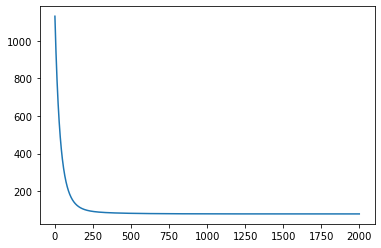

In [726]:
#We would like to try removing a single feature, and shall do so by testing all possibilities.
features_columns = ["gdp_per_capita", "pop_density", "pop_over_65", \
                    "stringency_index", "fully_vaccinated", "icu_patients"]
new_models_features = {}
for f in features_columns:
    new_features = features_columns.copy()
    new_features.remove(f)
    new_models_features[f] = new_features
#Now we have a dictionary where the removed features are keys,
#and the corresponding reamining features are values.
    
#Now we want to make a separate dictionary that can contain the keys,
#as well as all the details of the corresponding models.
new_models_dict = {}
iterations = 2000
alpha = 0.01

for k,v in new_models_features.items():
    df_features, df_target = get_features_targets(df1, v, ["deaths_in_following_week"])
    #We prepare our features and target.
    feature = prepare_feature(df_features)
    target = prepare_target(df_target)
    beta = np.zeros((feature.shape[1],1))
    J = compute_cost(feature, target, beta)
    beta, J_storage = gradient_descent(feature, target, beta, alpha, iterations)
    pred = predict(df_features, beta)
    new_models_dict[k] = {"target": target, "pred": pred, "beta": beta, "J_storage": J_storage, \
                          "RMSE": rmse(target, pred), "MAE": mae(target, pred)}
    
for i in new_models_dict:
    print(f"{i}:", f"RMSE = {new_models_dict[i]['RMSE']},", f"MAE = {new_models_dict[i]['MAE']}")

#We remember that the RMSE and MAE of the original model is 12.559 and 8.903 respectively.
#While none of the new models reduces both errors, we see that removing pop_density has the least effect on them.
#It is highly likely that pop_density is a false variable contributing to overfitting.
#Hence, we will make a new model that has all features other than pop_density.

target, pred = new_models_dict["pop_density"]["target"], new_models_dict["pop_density"]["pred"]
beta, J_storage = new_models_dict["pop_density"]["beta"], new_models_dict["pop_density"]["J_storage"]

plt.plot(J_storage)

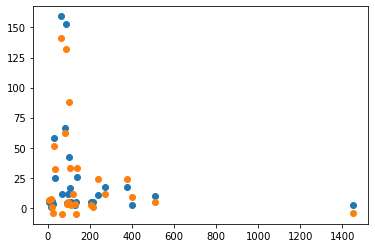

In [706]:
#Like before, we can plot the graphs to visualise the model's accuracy.
plt.scatter(df1_features["pop_density"], target)
plt.scatter(df1_features["pop_density"], pred)

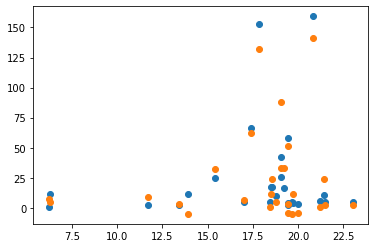

In [707]:
plt.scatter(df1_features["pop_over_65"], target)
plt.scatter(df1_features["pop_over_65"], pred)

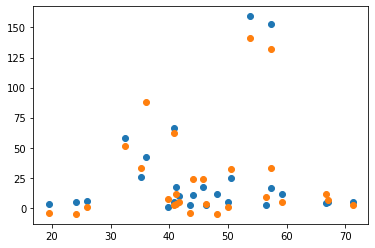

In [708]:
plt.scatter(df1_features["stringency_index"], target)
plt.scatter(df1_features["stringency_index"], pred)

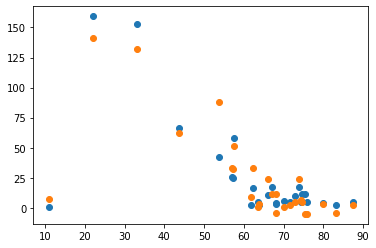

In [709]:
plt.scatter(df1_features["fully_vaccinated"], target)
plt.scatter(df1_features["fully_vaccinated"], pred)

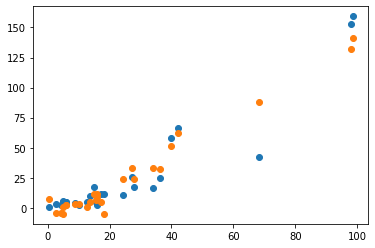

In [710]:
plt.scatter(df1_features["icu_patients"], target)
plt.scatter(df1_features["icu_patients"], pred)

# Part 2

### Overview About the Problem

We wish to help the countries of the world find out if their vaccination efforts are up to par by predicting the percentage of unvaccinated people getting their first jabs during a certain period, based on factors such as the GDP per capita, number of cases and death cases about 2 weeks before our predicted period.


### Dataset

Sources: \
GDP per Capita based on PPP (2018): https://www.kaggle.com/nitishabharathi/gdp-per-capita-all-countries. \
Literacy Rate(2017): https://www.kaggle.com/fernandol/countries-of-the-world. \
All other values: https://ourworldindata.org/covid-cases or derived from other values.



,country,gdp_per_capita,literacy_rate,initial_cases,initial_deaths,new_vaccinations_percentage,7_days_new_vaccinations,not_fully_vaccinated_percent,new_vaccinations_per_unvaccinated
0,Algeria,15481.78762,70.0,12.08,0.47,0.0100,0.0700,89.32,0.078370
1,Austria,55454.68929,98.0,2629.31,8.96,0.1388,0.9716,38.09,2.550801
2,Belgium,51407.99834,98.0,3367.25,9.37,0.0345,0.2415,26.42,0.914080
3,Canada,48130.25597,97.0,457.63,6.36,0.0387,0.2709,26.27,1.031214
4,Cyprus,38513.28457,97.6,1110.48,6.70,0.0393,0.2751,36.58,0.752050
5,Czech Republic,39743.59709,99.9,2011.36,6.62,0.1326,0.9282,43.43,2.137232
6,Denmark,55671.16527,100.0,1510.16,1.89,0.0319,0.2233,24.26,0.920445
7,Estonia,35973.77646,99.8,7534.78,30.18,0.1275,0.8925,43.27,2.062630
8,Finland,48416.93603,100.0,663.44,5.41,0.0351,0.2457,31.49,0.780248
9,France,45342.39574,99.0,556.73,3.25,0.0304,0.2128,32.30,0.658824


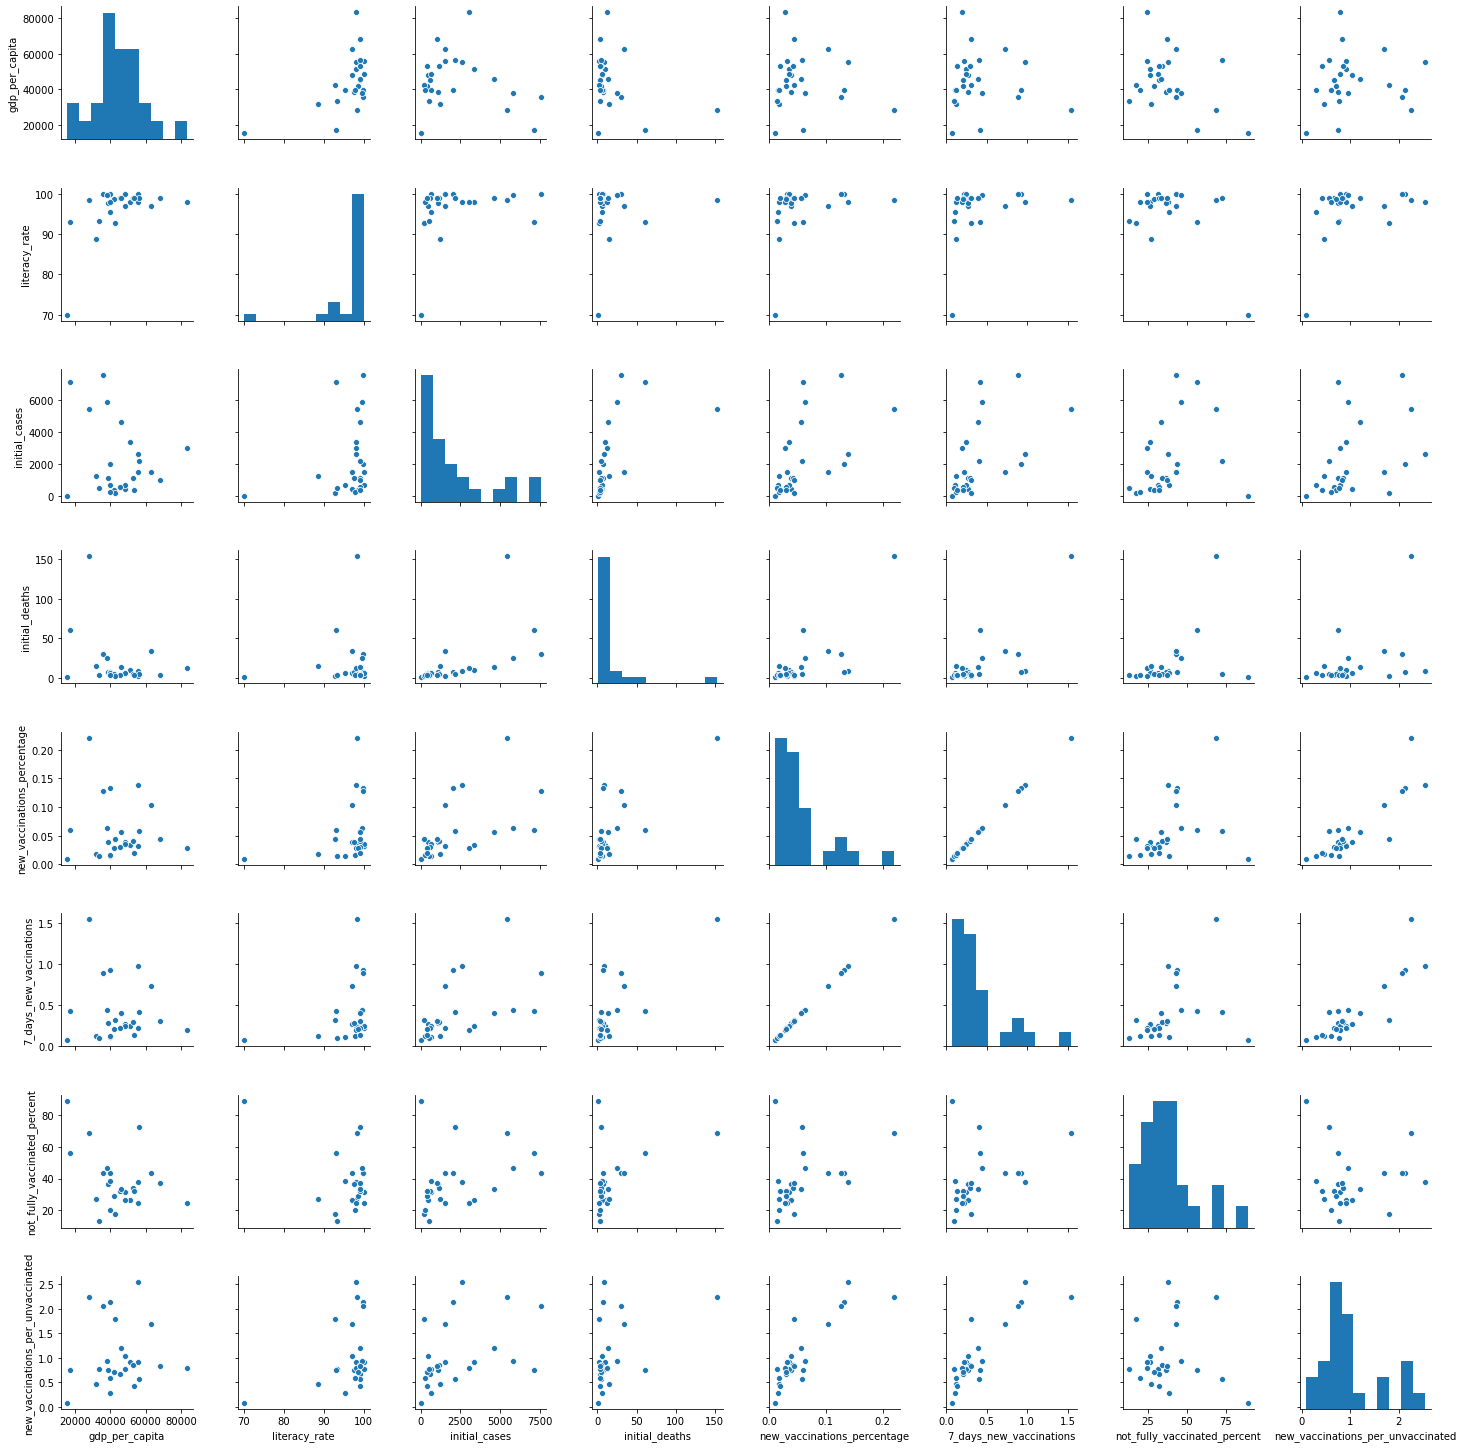

In [715]:
df2 = pd.read_csv("Task_2.csv")

display(df2)

sns.pairplot(data=df2)

### Features and Target Preparation

Our chosen features are: 
- "gdp_per_capita", GDP per capita by PPP (2018)
    - Represents the country's economy, purchasing power and medical preparedness.
- "literacy_rate", Literacy rate (2017)
    - Represents the education level of the country's populace.
- "initial_cases", Number of cases during specified period (19 Oct - 25 Oct here).
- "initial_deaths", Number of deaths during specified period (19 Oct - 25 Oct here).
    - These represent the severity of Covid in the country, and should project the 

Our target is obtained as such:
- "new_vaccinations_percentage" is the 7-day rolling average percentage of the population getting their first jab, measured at a later period (roughly a week to two after the previously specified period, 2 Nov - 8 Nov here). 
    - It is multiplied by 7 to get the percentage of the population getting their first jab during the same period, and is represented in the dataset as "7_days_new_vaccinations".
- "not_fully_vaccinated_percent" is the percentage of the population that is not yet fully vaccinated. Due to data only existing for people who are fully vaccinated and not for people who are completely unvaccinated, this is as accurate as we can get.
- "7_days_new_vaccinations" / "not_fully_vaccinated_percent" * 100 gives us the percentage of unvaccinated people getting their first jabs, and is represented by "new_vaccinations_per_unvaccinated".
    - "new_vaccinations_per_unvaccinated" is the target that we want to use in our model.

In [796]:
feature_columns = ["gdp_per_capita", "literacy_rate", "initial_cases", "initial_deaths"]

df2_features, df2_target = get_features_targets(df2, feature_columns, ["new_vaccinations_per_unvaccinated"])

### Building Model



In [797]:
#The model uses Multiple Linear Regression

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    if random_state!=None:
        np.random.seed(random_state)
    indices = df_feature.index
    ls_of_index = np.random.choice(indices, size=int(test_size*len(indices)), replace=False)
    test_indices = set(ls_of_index)
    train_indices = set(df_feature.index) - test_indices
    df_feature_train = df_feature.loc[train_indices,:]
    df_feature_test = df_feature.loc[test_indices,:]
    df_target_train = df_target.loc[train_indices,:]
    df_target_test = df_target.loc[test_indices,:]
    return df_feature_train, df_feature_test, df_target_train, df_target_test


df2_features_train, df2_features_test, df2_target_train, df2_target_test = \
split_data(df2_features, df2_target, 69420, 0.3)

feature = prepare_feature(df2_features_train)
target = prepare_target(df2_target_train)

iterations = 2000
alpha = 0.01
beta = np.zeros((feature.shape[1],1))

beta, J_storage = gradient_descent(feature, target, beta, alpha, iterations)

pred = predict(df2_features_test, beta)

### Evaluating the Model



In [798]:
#We expected all of the variables to have a positive beta coefficient, but that does not appear to be the case...
print(beta)

[[ 0.98597449]
 [-0.13759468]
 [ 0.24112384]
 [ 0.5265866 ]
 [-0.42320369]]


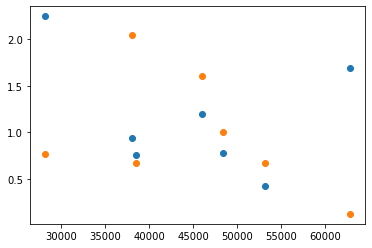

In [799]:
#Scatter plots show us that the model has much room for improvement.
plt.scatter(df2_features_test["gdp_per_capita"], df2_target_test)
plt.scatter(df2_features_test["gdp_per_capita"], pred)

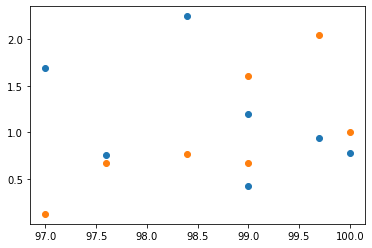

In [800]:
plt.scatter(df2_features_test["literacy_rate"], df2_target_test)
plt.scatter(df2_features_test["literacy_rate"], pred)

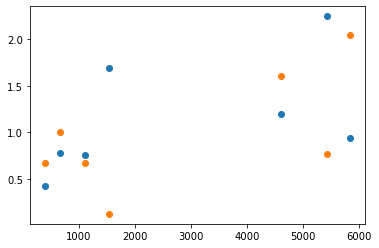

In [801]:
plt.scatter(df2_features_test["initial_cases"], df2_target_test)
plt.scatter(df2_features_test["initial_cases"], pred)

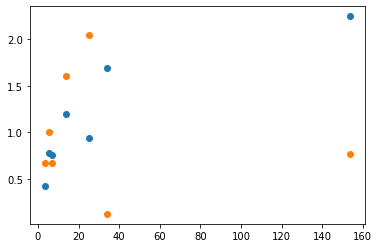

In [802]:
plt.scatter(df2_features_test["initial_deaths"], df2_target_test)
plt.scatter(df2_features_test["initial_deaths"], pred)

In [803]:
#To evaluate our model's accuracy, we refer to RMSE and MAE, and aim to improve the model by minimizing them.
print(rmse(df2_target_test, pred))
print(mae(df2_target_test, pred))

0.936780488329709
0.7294254699258027


### Improving the Model

Discuss any steps you can do to improve the models. Put any python codes. You can repeat the steps above with the codes to show the improvement in the accuracy. 

In [804]:
features_columns = ["gdp_per_capita", "literacy_rate", "initial_cases", "initial_deaths"]
new_models_features = {}
for f in features_columns:
    new_features = features_columns.copy()
    new_features.remove(f)
    new_models_features[f] = new_features
#Now we have a dictionary where the removed features are keys,
#and the corresponding reamining features are values.
    
#Now we want to make a separate dictionary that can contain the keys,
#as well as all the details of the corresponding models.
new_models_dict = {}
iterations = 2000
alpha = 0.01

for k,v in new_models_features.items():
    df_features, df_target = get_features_targets(df2, v, ["new_vaccinations_per_unvaccinated"])
    #Unlike in Task 1, the data must be split.
    df_features_train, df_features_test, df_target_train, df_target_test = \
    split_data(df_features, df_target, 69420, 0.3)
    #We prepare our features and target (training set).
    feature = prepare_feature(df_features_train)
    target = prepare_target(df_target_train)
    beta = np.zeros((feature.shape[1],1))
    J = compute_cost(feature, target, beta)
    beta, J_storage = gradient_descent(feature, target, beta, alpha, iterations)
    #We make our predictions and check errors using the test set.
    pred = predict(df_features_test, beta)
    new_models_dict[k] = {"target": df_target_test, "pred": pred, "beta": beta, "J_storage": J_storage, \
                          "RMSE": rmse(df_target_test, pred), "MAE": mae(df_target_test, pred)}
    
for i in new_models_dict:
    print(f"{i}:", f"RMSE = {new_models_dict[i]['RMSE']},", f"MAE = {new_models_dict[i]['MAE']}")
    
#Here, we observe that removing initial_deaths minimizes both errors.

target, pred = new_models_dict["initial_deaths"]["target"], new_models_dict["initial_deaths"]["pred"]
beta, J_storage = new_models_dict["initial_deaths"]["beta"], new_models_dict["initial_deaths"]["J_storage"]

gdp_per_capita: RMSE = 0.8349322047261052, MAE = 0.6508199327777473
literacy_rate: RMSE = 0.7900936987111862, MAE = 0.5916870541286666
initial_cases: RMSE = 0.726001699209842, MAE = 0.5826887297412395
initial_deaths: RMSE = 0.676285724978641, MAE = 0.5263647508088981


In [805]:
#The beta coefficients look better now, but gdp_per_capita still has a negative beta coefficient.
print(beta)

[[ 0.98597449]
 [-0.0206344 ]
 [ 0.23667627]
 [ 0.18438003]]


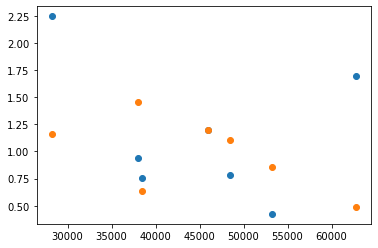

In [806]:
plt.scatter(df2_features_test["gdp_per_capita"], target)
plt.scatter(df2_features_test["gdp_per_capita"], pred)

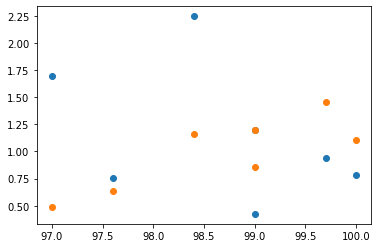

In [807]:
plt.scatter(df2_features_test["literacy_rate"], target)
plt.scatter(df2_features_test["literacy_rate"], pred)

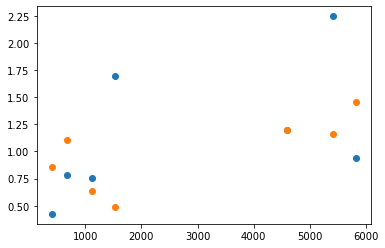

In [808]:
plt.scatter(df2_features_test["initial_cases"], target)
plt.scatter(df2_features_test["initial_cases"], pred)

In [809]:
features_columns = ["gdp_per_capita", "literacy_rate", "initial_cases"]
new_models_features = {}
for f in features_columns:
    new_features = features_columns.copy()
    new_features.remove(f)
    new_models_features[f] = new_features
#Now we have a dictionary where the removed features are keys,
#and the corresponding reamining features are values.
    
#Now we want to make a separate dictionary that can contain the keys,
#as well as all the details of the corresponding models.
new_models_dict = {}
iterations = 2000
alpha = 0.01

for k,v in new_models_features.items():
    df_features, df_target = get_features_targets(df2, v, ["new_vaccinations_per_unvaccinated"])
    #Unlike in Task 1, the data must be split.
    df_features_train, df_features_test, df_target_train, df_target_test = \
    split_data(df_features, df_target, 69420, 0.3)
    #We prepare our features and target (training set).
    feature = prepare_feature(df_features_train)
    target = prepare_target(df_target_train)
    beta = np.zeros((feature.shape[1],1))
    J = compute_cost(feature, target, beta)
    beta, J_storage = gradient_descent(feature, target, beta, alpha, iterations)
    #We make our predictions and check errors using the test set.
    pred = predict(df_features_test, beta)
    new_models_dict[k] = {"target": df_target_test, "pred": pred, "beta": beta, "J_storage": J_storage, \
                          "RMSE": rmse(df_target_test, pred), "MAE": mae(df_target_test, pred)}
    
for i in new_models_dict:
    print(f"{i}:", f"RMSE = {new_models_dict[i]['RMSE']},", f"MAE = {new_models_dict[i]['MAE']}")
    
#Here, we observe that removing literacy_rate minimizes both errors.

target, pred = new_models_dict["literacy_rate"]["target"], new_models_dict["literacy_rate"]["pred"]
beta, J_storage = new_models_dict["literacy_rate"]["beta"], new_models_dict["literacy_rate"]["J_storage"]

gdp_per_capita: RMSE = 0.6662050598771712, MAE = 0.5182793383629246
literacy_rate: RMSE = 0.539341249722597, MAE = 0.36434582209115246
initial_cases: RMSE = 0.7661159722745957, MAE = 0.6091796508748701


In [810]:
#The beta coefficients are now all positive, but there are only 2 features left...
print(beta)

[[0.98597449]
 [0.12955159]
 [0.25164193]]


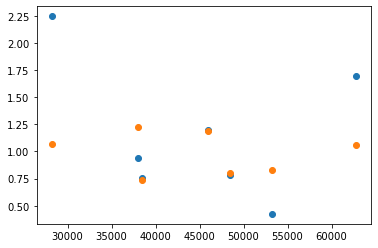

In [811]:
plt.scatter(df2_features_test["gdp_per_capita"], target)
plt.scatter(df2_features_test["gdp_per_capita"], pred)

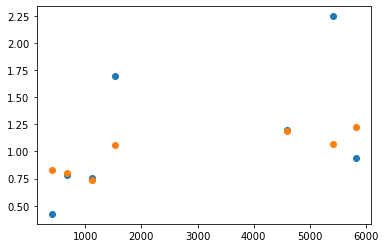

In [812]:
plt.scatter(df2_features_test["initial_cases"], target)
plt.scatter(df2_features_test["initial_cases"], pred)

### Discussion and Analysis

Discuss your model and accuracy in solving the problem. Analyze the results of your metrics. Put any conclusion here.

In [813]:
#We conclude with the above model, where gdp_per_capita and initial_cases are the only features.
#While the model is not perfect, this is the most optimal multiple linear regression model for this dataset.